# Simple Linear Regression

## Importing Important Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
#import dataset and see head of data
data=pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#last 5 observation of the data 
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
#basic insights of data like measure of central tendencies and dispersions 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#shape of the data
data.shape

(25, 2)

In [6]:
#info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#checking null values in data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization 

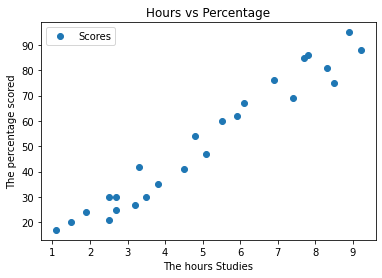

In [8]:
#Visualization of the data by using scatter plot
data.plot(x="Hours", y="Scores",style='o')
plt.title('Hours vs Percentage')
plt.xlabel('The hours Studies')
plt.ylabel('The percentage scored')
plt.show()

## Correlation

In [9]:
#finding correlation between variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Splitting Data

In [10]:
#splitting data
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

## Regression Model

In [14]:
#model 
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

## Predicting the percentage of marks

In [15]:
#prediction 
pred_y=linreg.predict(X_test)

In [16]:
prediction=pd.DataFrame({'Hours':[i[0] for i in X_test], 'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [17]:
#comparing Actual and predicted values
compare_scores=pd.DataFrame({'Actual marks':Y_test,'Predicted marks':pred_y})
compare_scores

,Actual marks,Predicted marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


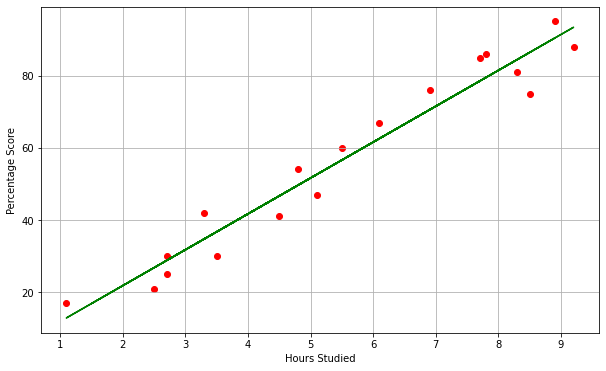

In [18]:
# Plotting for the training data
line = linreg.coef_*X + linreg.intercept_


plt.rcParams["figure.figsize"] = [10,6]
plt.scatter(X_train,Y_train, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

## Evaluating the model

In [19]:
#Evaluating the model
print("Mean Absolute Error:",mean_absolute_error(Y_test,pred_y))

Mean Absolute Error: 4.130879918502486


## Calculating the score of a student who studies for 7 hour

In [20]:
#Calculating the score of a student who studies for 7 hour
hour=[7]
answer=linreg.predict([hour])
print("Score = {}".format(round(answer[0],3)))

Score = 71.524
